In [1]:
import os
import glob
import PIL
import cv2
import random
from PIL import Image
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow
import tensorflow as tf
from tensorflow.keras import layers
import keras 
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

%matplotlib inline

In [2]:
image_path = os.getcwd() + "\iccv09Data\iccv09Data\images"
images_directory = glob.glob(image_path + "/*.jpg")
seg_path = os.getcwd() +  "\iccv09Data\iccv09Data\labels"
layers_directory = glob.glob(seg_path + "/*.layers.txt")

print('images :- ' , images_directory[0])
print('layers :- '+ layers_directory[0])

images :-  C:\Users\ADMIN\Tution\Deep_learning\DL_project\iccv09Data\iccv09Data\images\0000047.jpg
layers :- C:\Users\ADMIN\Tution\Deep_learning\DL_project\iccv09Data\iccv09Data\labels\0000047.layers.txt


In [3]:
image_path = r'C:\Users\ADMIN\Tution\Deep_learning\DL_project\iccv09Data\iccv09Data\images'

image_names = list(map(lambda x: x.replace('.jpg',''), os.listdir(image_path)))
print(f'Name of images example = {image_names[:3]}')

Name of images example = ['0000047', '0000051', '0000059']


In [4]:
def text_to_image_and_save(directory, target_directory, file_name):
    unique_val = set()
    for idx, img in enumerate(directory):
        layer_map = np.loadtxt(img).astype(np.uint8)
        layer_img = Image.fromarray(layer_map).convert('P')
#         layer_img.save(f'{target_directory}\\{file_name[idx]}.png')

In [5]:
layers_folder_loc = r'C:\Users\ADMIN\Tution\Deep_learning\DL_project\iccv09Data\iccv09Data\layers'

# UNDO THE #
# layers_data = text_to_image_and_save(layers_directory, layers_folder_loc, image_names)

In [6]:
random_image = random.choice(image_names)

image_example = f'{image_path}\\{random_image}.jpg'
layor_example = f'{layers_folder_loc}\\{random_image}.png'

print(f'random image name generate for visulization is {random_image}')

random image name generate for visulization is 6000087


In [7]:
def image_shape(directory):
    image_map = Image.open(directory)
    image_array = img_to_array(image_map).shape
    return image_array

# IMAGE GIVING WRONG MASK VALUE
def image_pixel_values(directory):   
    label = PIL.Image.open(directory).convert('P')
    label = np.asarray(label)
    return set(label.flatten())

In [8]:
# shape of all the directory images

print(f'Image data shape : {image_shape(image_example)}')
print(f'Layer data size : {image_shape(layor_example)}')
print(f'mask pixel values : {image_pixel_values(layor_example)}')

Image data shape : (240, 320, 3)
Layer data size : (240, 320, 1)
mask pixel values : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


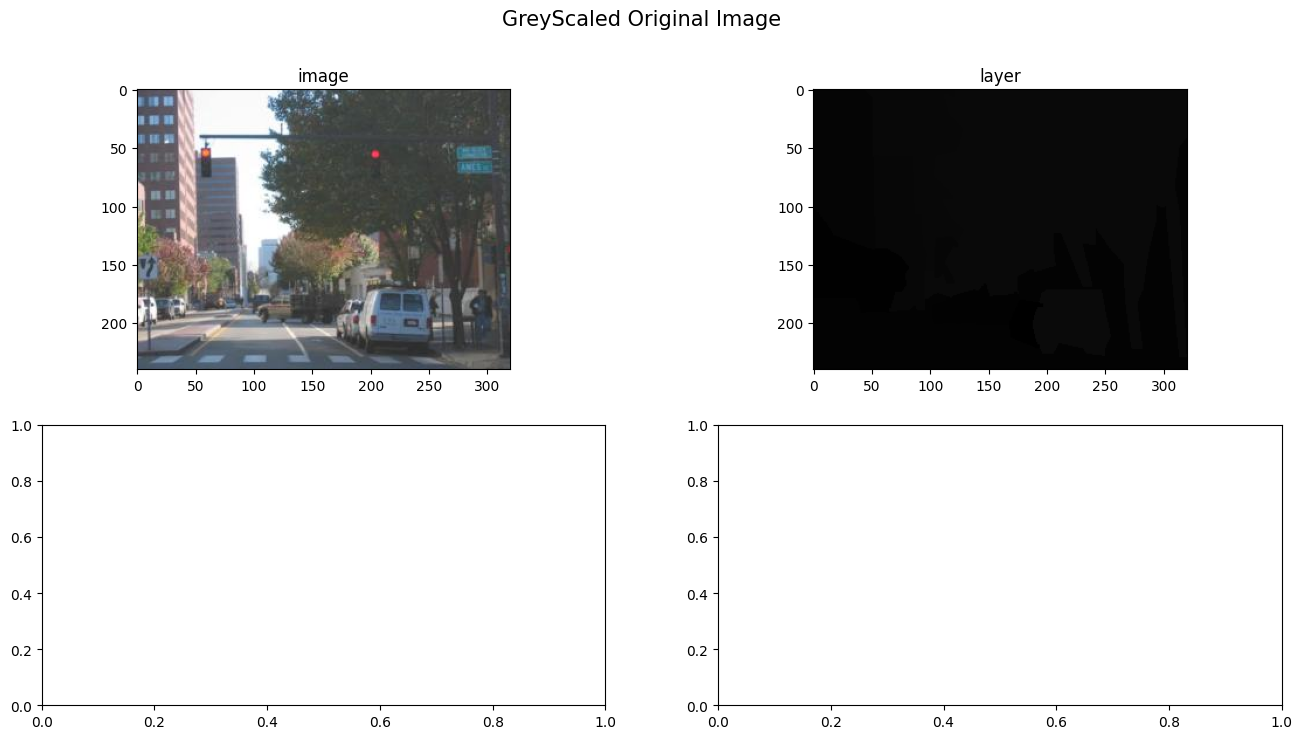

In [9]:
fig, axes = plt.subplots(2,2, figsize=(16, 8))

fig.suptitle("GreyScaled Original Image", fontsize=15)

axes[0,0].set_title('image')
axes[0,0].imshow(Image.open(image_example));

axes[0,1].set_title('layer')
axes[0,1].imshow(Image.open(layor_example));

In [10]:
def increase_visiblity(location):
    image = img_to_array(load_img(location))
    image = np.array(image, dtype=float)*15
    return array_to_img(image)

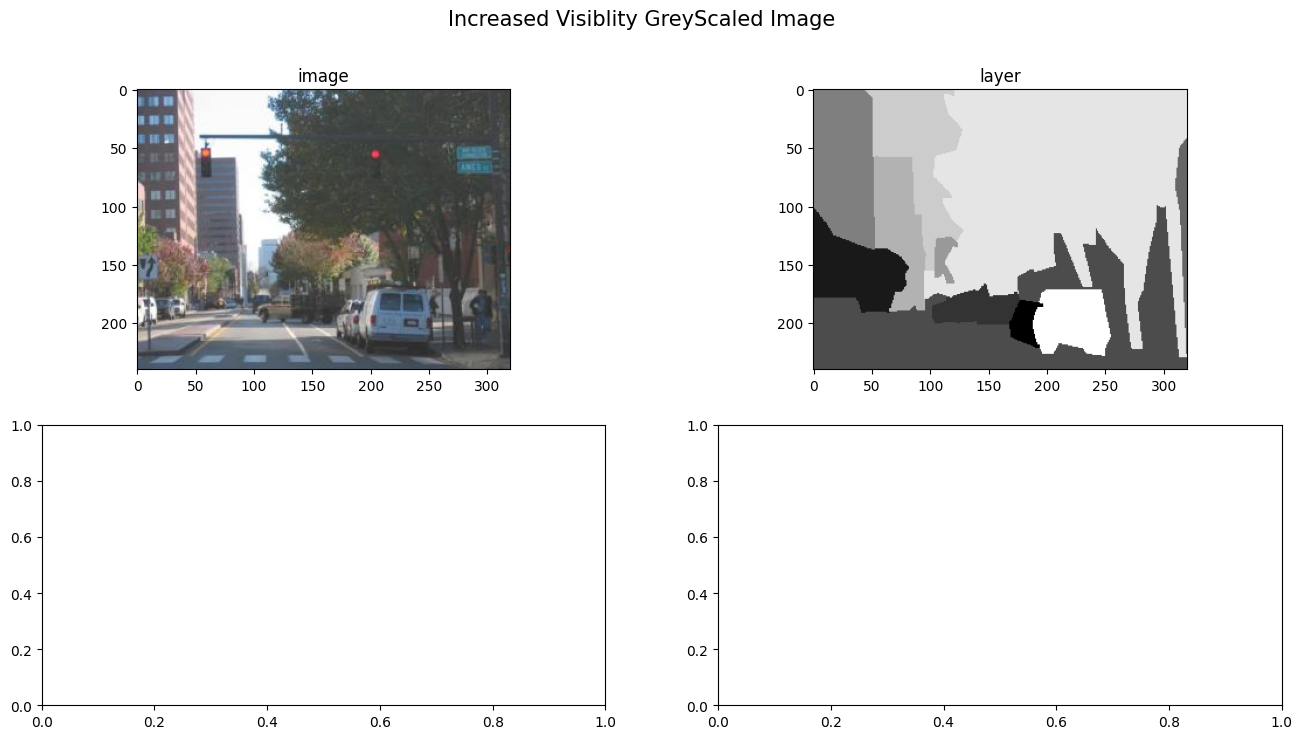

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

fig.suptitle("Increased Visiblity GreyScaled Image", fontsize=15)

axes[0,0].set_title('image')
axes[0,0].imshow(Image.open(f'{image_path}\\{random_image}.jpg'));

axes[0,1].set_title('layer')
axes[0,1].imshow(increase_visiblity(f'{layers_folder_loc}\\{random_image}.png'));

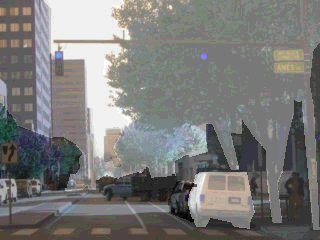

In [12]:
img1 = cv2.imread(f'{image_path}\\{random_image}.jpg')
img2 = cv2.imread(f'{layers_folder_loc}\\{random_image}.png')
dst = cv2.addWeighted(img1, 0.05, img2, 0.9, 0)
array_to_img(dst)

In [13]:
IMAGE_SIZE = 128
CLASSES = ['sky', 'tree', 'road', 'grass',
              'water', 'building', 'mountain', 
              'foreground object']
class_value = [0,1,2,3,4,5,6,7]
n_classes = len(CLASSES)

In [14]:
# images_directory = glob.glob(layers_folder_loc+'\*.png')
image_path = glob.glob(r"C:\Users\ADMIN\Tution\Deep_learning\DL_project\iccv09Data\iccv09Data\images\\*.jpg")

image_dataset = []
for img in image_path:
    img_array = cv2.imread(img, 1)
    new_array = cv2.resize(img_array, (IMAGE_SIZE,IMAGE_SIZE))
    image_dataset.append(new_array)
image_dataset = np.stack(image_dataset)
image_dataset.shape

(715, 128, 128, 3)

In [15]:
# LOAD MASK DIRECT FROM FILE
layer_images_directory = glob.glob(layers_folder_loc+'\*.png')

layor_dataset = []
for i in layers_directory:
    img_array = np.loadtxt(i).astype(np.uint8)
    new_array = cv2.resize(img_array, (IMAGE_SIZE,IMAGE_SIZE))
    layor_dataset.append(new_array)
layor_dataset = np.stack(layor_dataset)
layor_dataset.shape

(715, 128, 128)

In [16]:
image_dataset = image_dataset / 255.0

In [17]:
print(f'Image data shape : {image_dataset.shape}')
print(f'Layer data size : {layor_dataset.shape}')
print(f'MAX pixel values in image : {image_dataset.max()}')
print(f'labels in mask image : {np.unique(layor_dataset)}')

Image data shape : (715, 128, 128, 3)
Layer data size : (715, 128, 128)
MAX pixel values in image : 1.0
labels in mask image : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 130 131 132 133 134]


In [18]:
X_train, y_train, X_test, y_test = train_test_split(image_dataset, layor_dataset, test_size=0.2)
print(f'training size = {len(X_train)} \nvalidation size = {len(y_train)}')

training size = 572 
validation size = 143


In [19]:
X_test = tf.one_hot(
    X_test,
    depth = n_classes,
)

y_test = tf.one_hot(
    y_test,
    depth = n_classes,
)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(572, 128, 128, 3)
(572, 128, 128, 8)
(143, 128, 128, 3)
(143, 128, 128, 8)


In [21]:
# 

In [22]:
X_test_mask = np.argmax(X_test, axis=3)

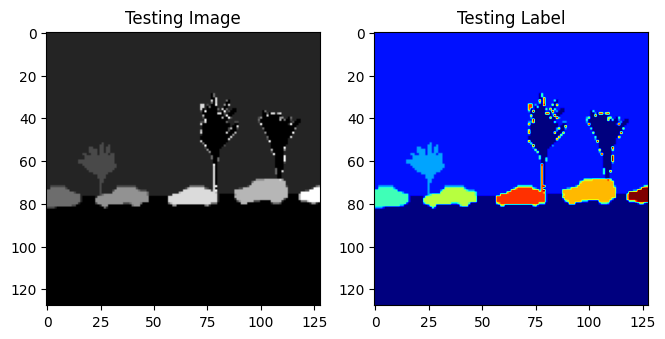

In [23]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(X_test_mask[0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(X_test_mask[0].tolist(), cmap='jet')

In [38]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [39]:
model = build_unet(input_shape, n_classes=n_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

softmax


In [26]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
input_shape

(128, 128, 3)

In [40]:
history = model.fit(X_train, X_test, 
                    batch_size = 7, 
                    verbose=1, 
                    epochs=10, 
                    validation_data=(y_train, y_test), 
                    shuffle=False)

Epoch 1/10
82/82 [==============================] - 27s 277ms/step - loss: 1.5076 - accuracy: 0.2378 - val_loss: 5.0559 - val_accuracy: 0.1423
Epoch 2/10
82/82 [==============================] - 18s 222ms/step - loss: 1.4709 - accuracy: 0.2655 - val_loss: 1.4968 - val_accuracy: 0.1426
Epoch 3/10
82/82 [==============================] - 18s 221ms/step - loss: 1.4698 - accuracy: 0.2762 - val_loss: 1.7002 - val_accuracy: 0.1374
Epoch 4/10
82/82 [==============================] - 18s 222ms/step - loss: 1.4749 - accuracy: 0.2817 - val_loss: 23.6907 - val_accuracy: 0.2915
Epoch 5/10
82/82 [==============================] - 18s 221ms/step - loss: 1.4688 - accuracy: 0.2775 - val_loss: 1.4987 - val_accuracy: 0.2120
Epoch 6/10
82/82 [==============================] - 18s 220ms/step - loss: 1.4671 - accuracy: 0.2945 - val_loss: 1.5246 - val_accuracy: 0.1499
Epoch 7/10
82/82 [==============================] - 18s 220ms/step - loss: 1.4668 - accuracy: 0.2871 - val_loss: 1.4632 - val_accuracy: 0.151

In [41]:
predicted_img = model.predict(y_train)

In [42]:
predicted_img.shape

(143, 128, 128, 8)

In [43]:
real_mask=np.argmax(y_test, axis=3)
real_mask.shape

(143, 128, 128)

In [44]:
predicted_mask=np.argmax(predicted_img, axis=3)
predicted_mask.shape

(143, 128, 128)

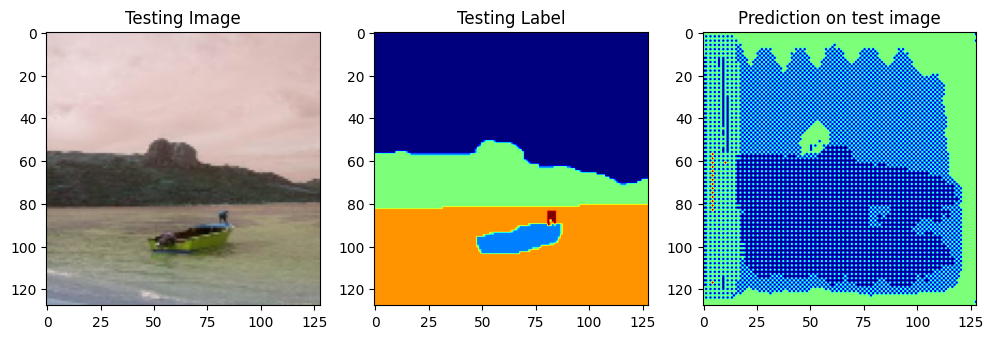

In [50]:
random = np.random.choice(np.arange(predicted_img.shape[0]))
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(y_train[random], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(real_mask[random].tolist(), cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_mask[random], cmap='jet')
plt.show()